### Know Your Culex Mosquitoes 
 

West Nile virus is spread by the Culex species of mosquito. The main vector species in the U.S. are Culex pipiens, Culex tarsalis, and Culex quinquefasciatus. These mosquitoes typically feed from evening to morning.


Culex pipiens, commonly known as the Northern House Mosquito, is found mainly in the Eastern U.S. It is a medium-sized mosquito with a brownish or grayish body and brown wings. Their larvae thrive in containers of stagnant, polluted water, and thus these mosquitoes are the primary target of the campaign to drain backyard sources of standing water as a way to reduce the incidence of WNV. In addition to WNV, Culex pipiens is a known carrier of St. Louis encephalitis, Western Equine encephalitis, and heartworm in dogs.


Culex tarsalis lives throughout the U.S., but is found mainly in the Midwest and West. It is a black mosquito distinguished by a white band on its proboscis, as well as white stripes along its middle and hind legs. Culex tarsalis is most active in the few hours after sunset.


Culex quinquefasciatus, the Southern House Mosquito, can be found in the southeastern region of the U.S. It is a medium-sized mosquito that is brown in color, and is a vector of WNV, St. Louis encephalitis, Western Equine encephalitis, and avian malaria.

In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv('./assets/test.csv')
train = pd.read_csv('./assets/train.csv')
spray = pd.read_csv('./assets/spray.csv')
weather = pd.read_csv('./assets/weather.csv')

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
def  date_separate (df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    return df

In [5]:
spray = date_separate(spray)

In [6]:
spray.Month.value_counts()

8    7988
7    3809
9    3038
Name: Month, dtype: int64

In [7]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 7 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
Year         14835 non-null int64
Month        14835 non-null int64
Day          14835 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 811.4+ KB


In [8]:
test.shape, train.shape, spray.shape, weather.shape

((116293, 11), (10506, 12), (14835, 7), (2944, 22))

In [9]:
train.columns = train.columns.str.lower()

In [10]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [11]:
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [12]:
train[['latitude','longitude','wnvpresent']].to_csv('tab.csv')

In [13]:
train['wnvpresent'].mean() #Unbalanced classes!

0.05244622120692937

In [14]:
for item in train:
    print (item)
    print (train[item].nunique())

date
95
address
138
species
7
block
64
street
128
trap
136
addressnumberandstreet
138
latitude
138
longitude
138
addressaccuracy
4
nummosquitos
50
wnvpresent
2


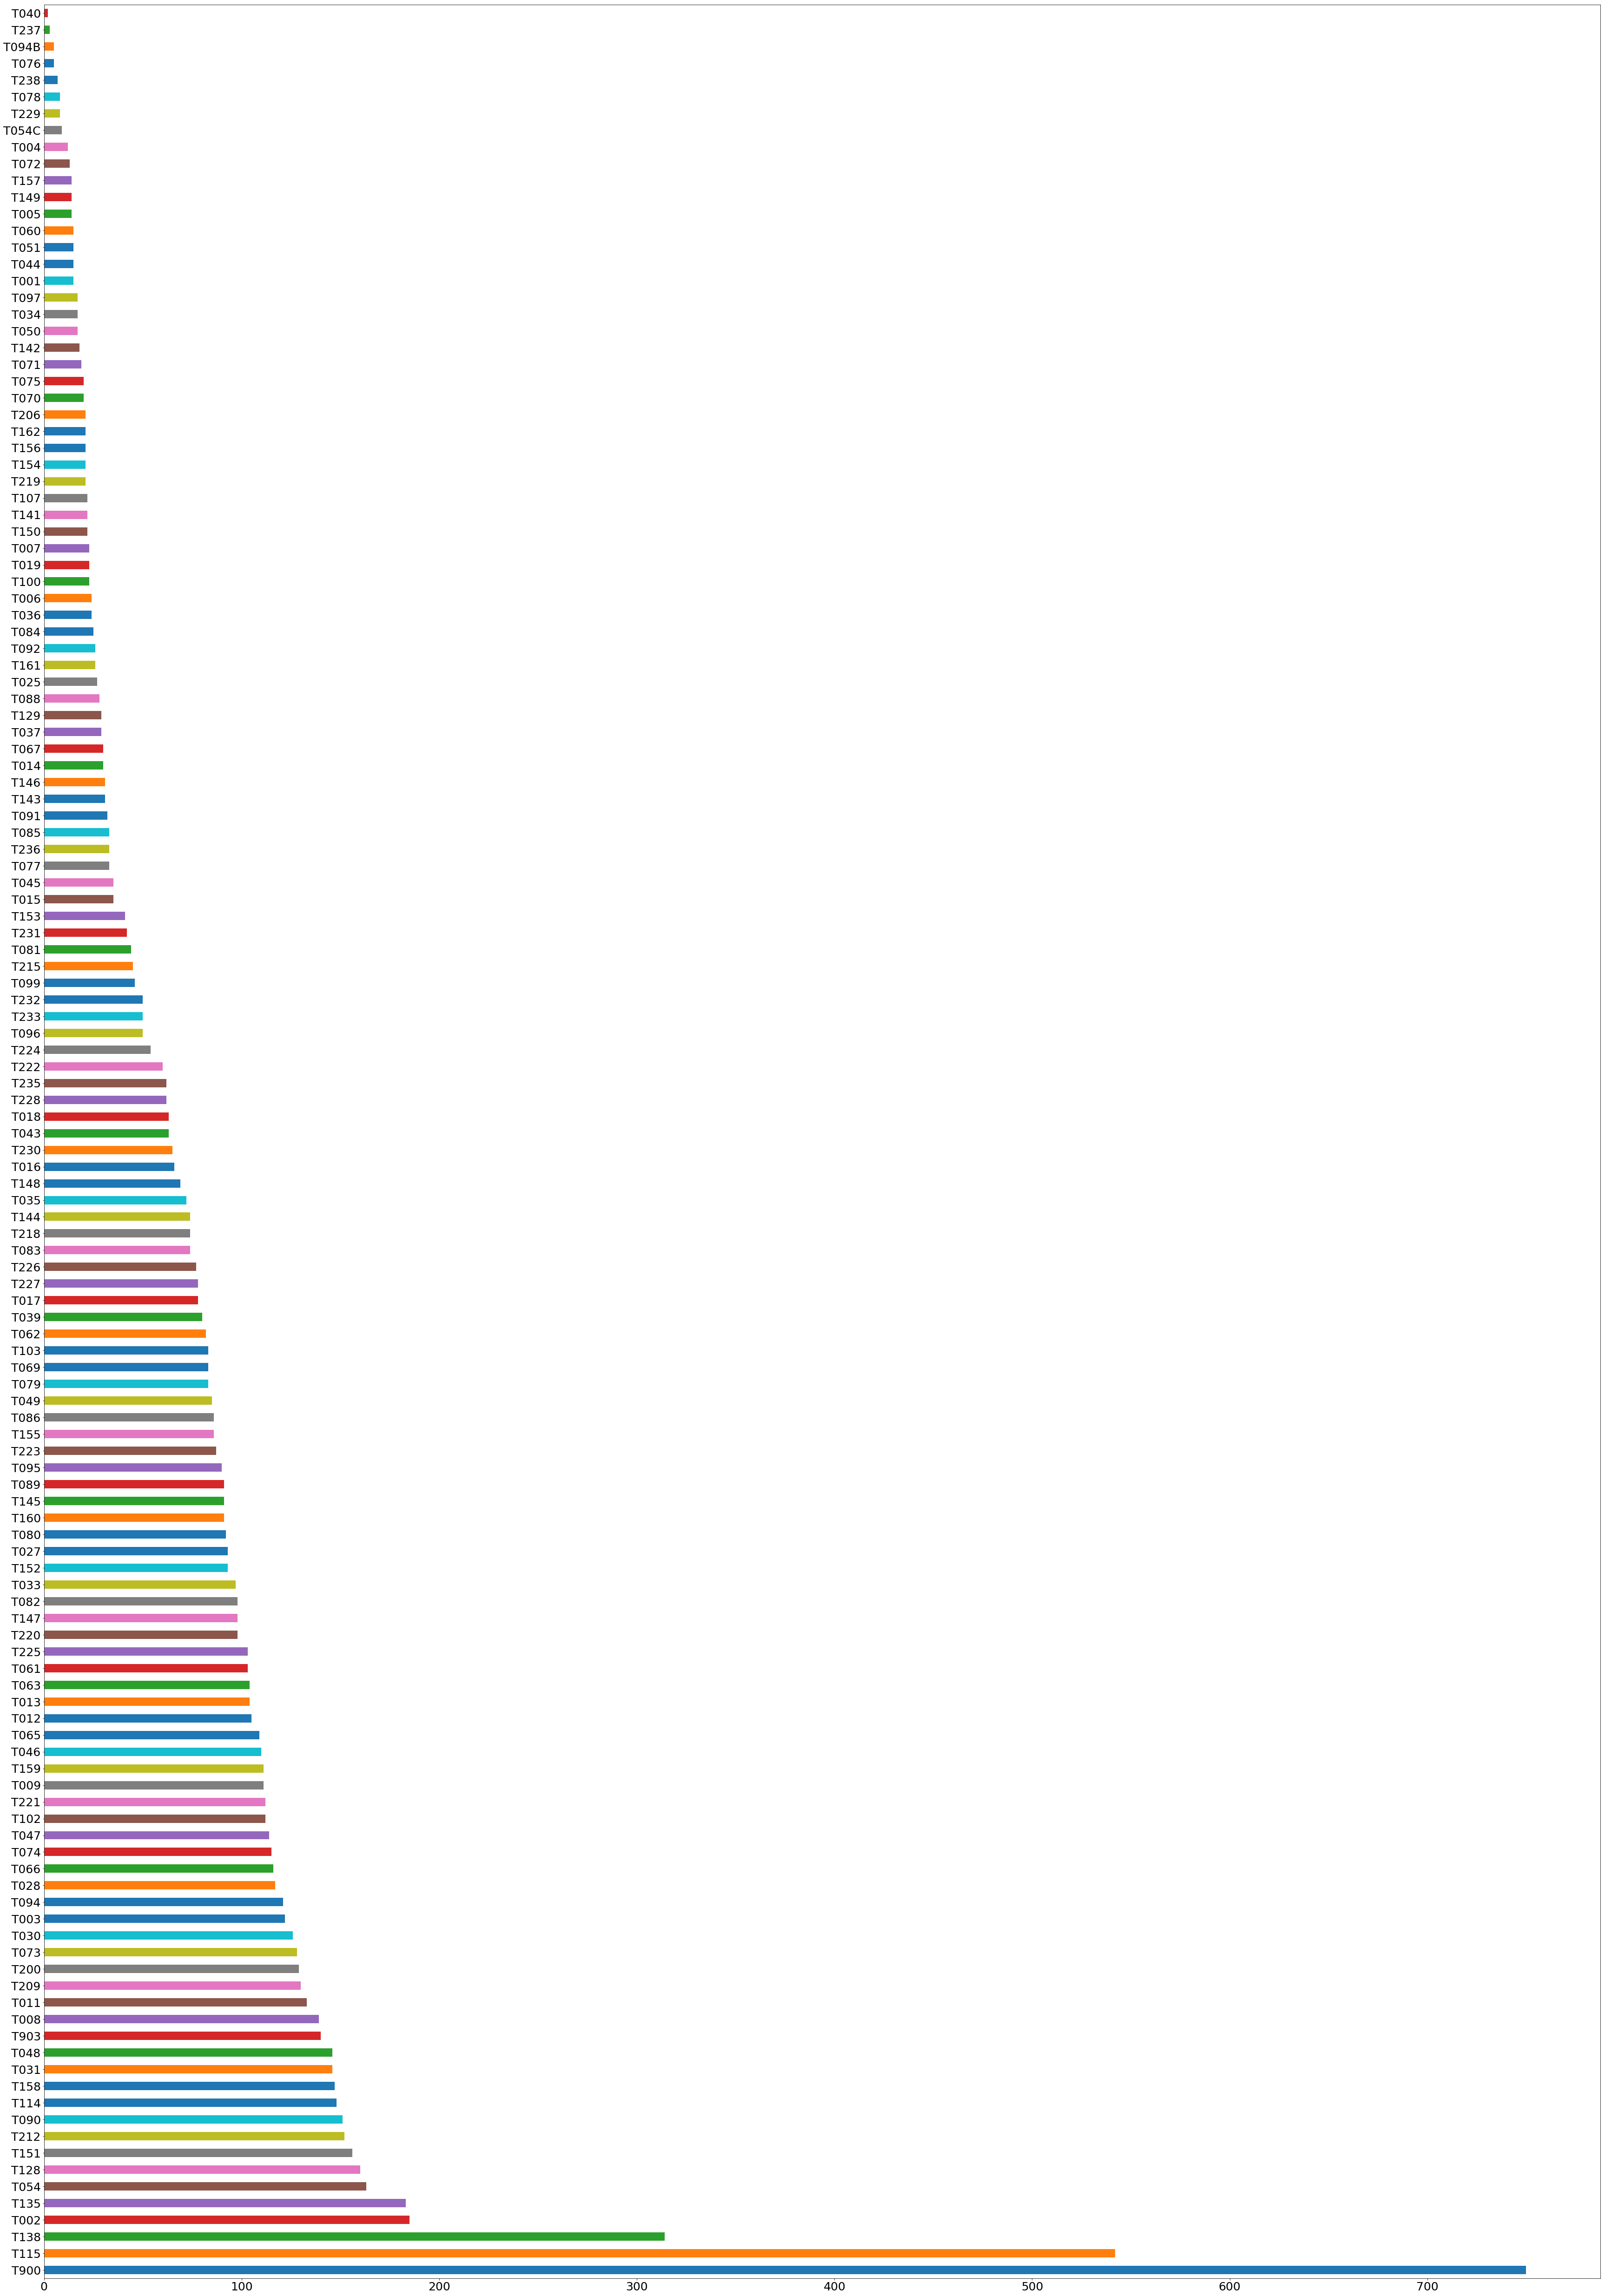

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

train['trap'].value_counts().plot(kind='barh', figsize=(60,90), fontsize=25)

In [16]:
new = []
for i in train['trap']:
    new.append(i[1:])
train['trap'] = new

In [17]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

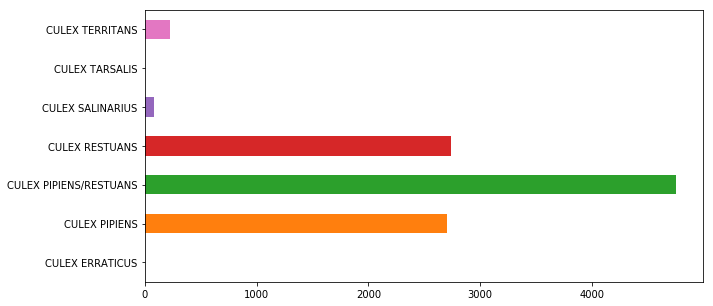

In [31]:
train.species.value_counts().sort_index().plot(kind='barh',figsize=(10,5), fontsize=10);

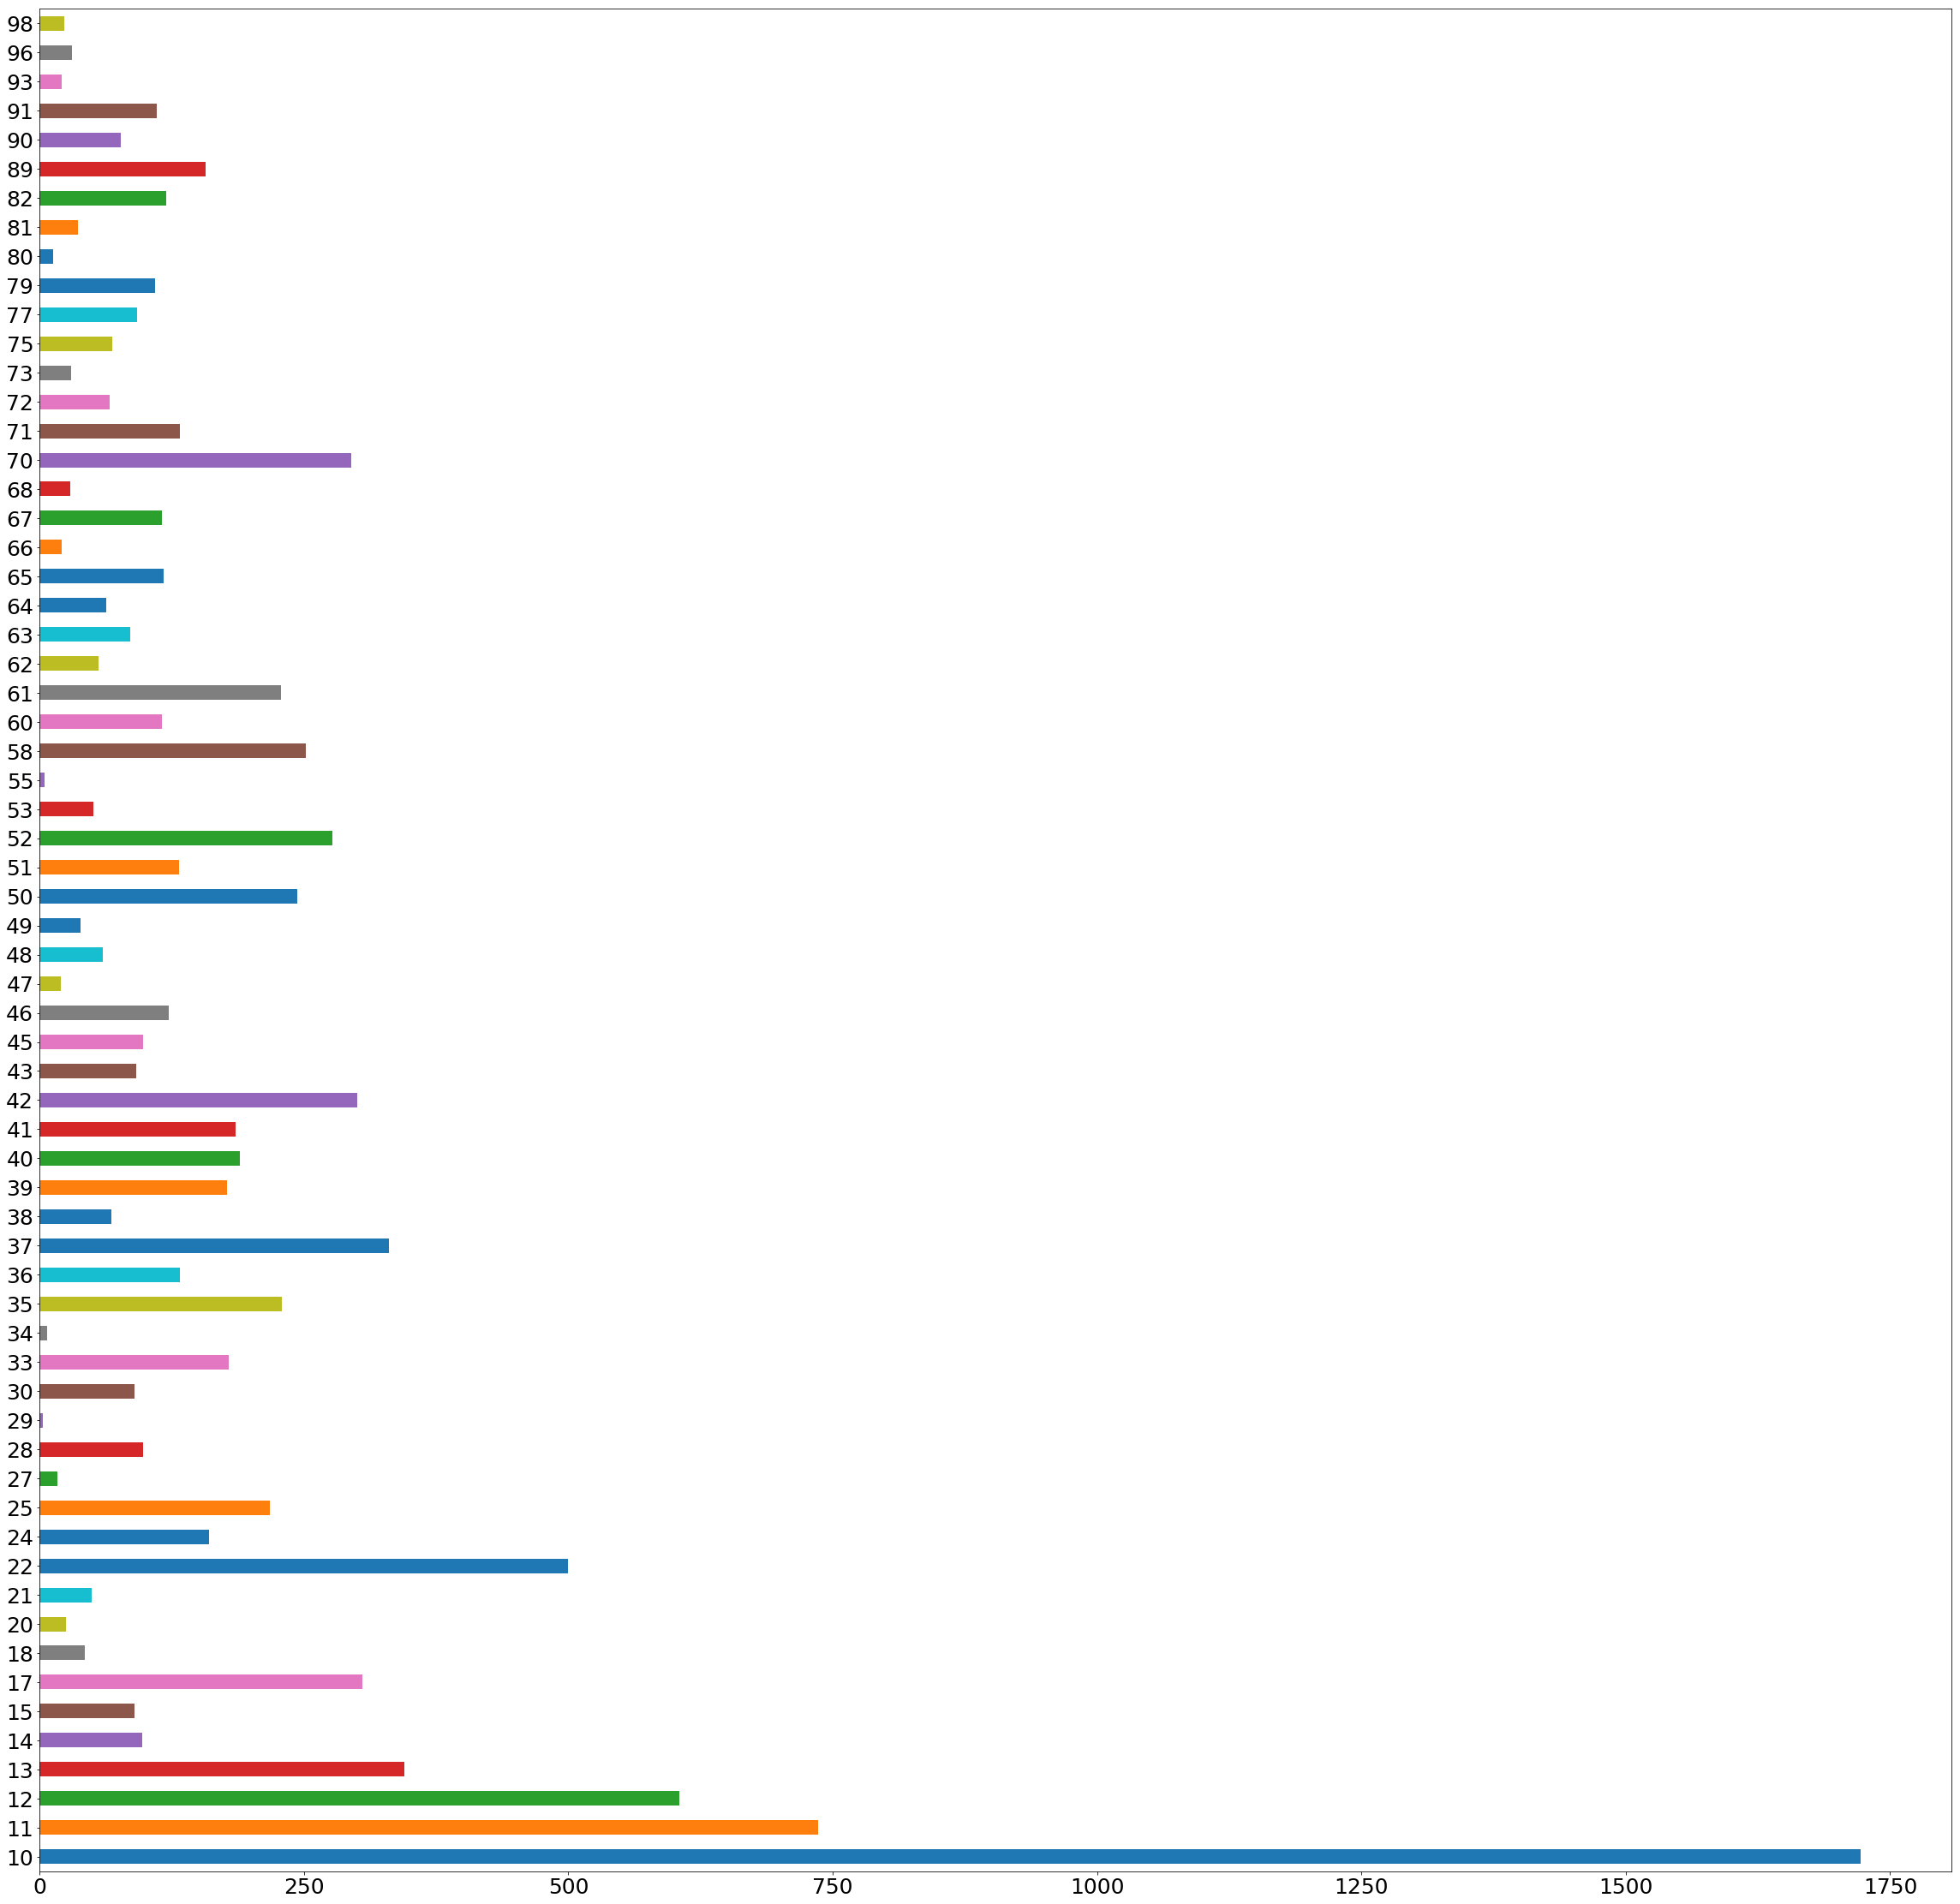

In [19]:
train.block.value_counts().sort_index().plot(kind='barh',figsize=(40,40), fontsize=25);

In [20]:
import seaborn as sns

/Users/veraburfield/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


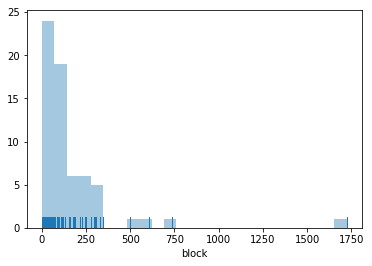

In [21]:
sns.distplot(train.block.value_counts(), kde=False, rug=True)

In [22]:
train.groupby('wnvpresent').species.value_counts()

wnvpresent  species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: species, dtype: int64

In [23]:
train.groupby('block').wnvpresent.value_counts()

block  wnvpresent
10     0             1611
       1              111
11     0              710
       1               26
12     0              564
       1               41
13     0              334
       1               11
14     0               92
       1                5
15     0               87
       1                3
17     0              294
       1               11
18     0               43
20     0               24
       1                1
21     0               46
       1                3
22     0              471
       1               29
24     0              149
       1               11
25     0              216
       1                2
27     0               17
28     0               94
       1                4
29     0                3
30     0               89
                     ... 
68     0               28
       1                1
70     0              279
       1               16
71     0              125
       1                8
72     0            

In [24]:
yes_wnw = train.query("wnvpresent=='1'")
yes_wnw.head(1)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1


In [25]:
x = pd.crosstab(train.nummosquitos, train.wnvpresent) #relationship between number of mosquitos and freq of virus

In [26]:
x['wnv_freq'] = x[1]/x[0]

In [27]:
x #good for plotting

wnvpresent,0,1,wnv_freq
nummosquitos,,,
1,2287,20,0.008745
2,1293,7,0.005414
3,881,15,0.017026
4,581,12,0.020654
5,470,19,0.040426
6,388,10,0.025773
7,313,13,0.041534
8,233,11,0.047210
9,220,17,0.077273


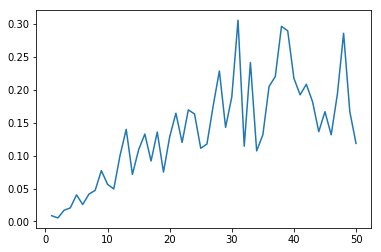

In [28]:
plt.plot(x['wnv_freq'])

In [29]:
mosquitos = pd.crosstab(train.block, train.wnvpresent)
block = pd.crosstab(train.wnvpresent, train.block)